In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

lineReg = LinearRegression()


In [2]:
# opens allegations file and reads first five lines/ displays

df= pd.read_csv('allegations_202007271729.csv')
df.head(5)

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,...,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
2,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
3,10007,John,Sears,078 PCT,5952,26146,7,2012,9,2013,...,25,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges)
4,10009,Noemi,Sierra,078 PCT,24058,40253,8,2018,2,2019,...,39,NaN,NaN,16.0,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A)


In [6]:
# records and colums/ info
df.info()
#df.shape()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33358 entries, 0 to 33357
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   unique_mos_id             33358 non-null  int64  
 1   first_name                33358 non-null  object 
 2   last_name                 33358 non-null  object 
 3   command_now               33358 non-null  object 
 4   shield_no                 33358 non-null  int64  
 5   complaint_id              33358 non-null  int64  
 6   month_received            33358 non-null  int64  
 7   year_received             33358 non-null  int64  
 8   month_closed              33358 non-null  int64  
 9   year_closed               33358 non-null  int64  
 10  command_at_incident       31814 non-null  object 
 11  rank_abbrev_incident      33358 non-null  object 
 12  rank_abbrev_now           33358 non-null  object 
 13  rank_now                  33358 non-null  object 
 14  rank_i

In [4]:
#statistical properties of dataset
df.describe()

,unique_mos_id,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,mos_age_incident,complainant_age_incident,precinct
count,33358.000000,33358.000000,33358.000000,33358.000000,33358.000000,33358.000000,33358.000000,33358.000000,28546.000000,33334.000000
mean,18169.912495,6451.608819,23905.058217,6.323551,2010.726782,6.470772,2011.525661,32.346873,32.484201,64.365213
std,9566.316896,7945.641596,11954.434138,3.362951,6.034725,3.343372,6.085907,6.040944,28.408963,31.451592
min,2.000000,0.000000,517.000000,1.000000,1985.000000,1.000000,1985.000000,20.000000,-4301.000000,0.000000
25%,9671.000000,1089.000000,13684.750000,3.000000,2007.000000,4.000000,2008.000000,28.000000,23.000000,43.000000
50%,19215.000000,3691.000000,25132.000000,6.000000,2012.000000,6.000000,2013.000000,31.000000,30.000000,67.000000
75%,25412.000000,7155.000000,34252.000000,9.000000,2016.000000,9.000000,2016.000000,36.000000,41.000000,81.000000
max,36374.000000,31977.000000,43703.000000,12.000000,2020.000000,12.000000,2020.000000,60.000000,101.000000,1000.000000


In [5]:
#correlation of data
df.corr()

/var/folders/4_/tl5y45h97j72d_pr9f2ddq6r0000gn/T/ipykernel_8394/4162298026.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,unique_mos_id,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,mos_age_incident,complainant_age_incident,precinct
unique_mos_id,1.000000,-0.141323,-0.104450,-0.008735,-0.109900,0.017320,-0.109504,-0.013019,-0.004951,0.084325
shield_no,-0.141323,1.000000,0.206952,-0.006204,0.201355,-0.013547,0.196437,-0.048928,0.005201,-0.016322
complaint_id,-0.104450,0.206952,1.000000,-0.002005,0.967972,-0.039091,0.958768,0.279957,0.055747,0.037677
month_received,-0.008735,-0.006204,-0.002005,1.000000,-0.047570,-0.031569,0.000241,0.006051,0.012332,-0.010726
year_received,-0.109900,0.201355,0.967972,-0.047570,1.000000,-0.027270,0.995375,0.289561,0.057706,0.032681
month_closed,0.017320,-0.013547,-0.039091,-0.031569,-0.027270,1.000000,-0.076248,-0.014238,-0.019576,-0.009729
year_closed,-0.109504,0.196437,0.958768,0.000241,0.995375,-0.076248,1.000000,0.288654,0.057621,0.032051
mos_age_incident,-0.013019,-0.048928,0.279957,0.006051,0.289561,-0.014238,0.288654,1.000000,0.038182,-0.027145
complainant_age_incident,-0.004951,0.005201,0.055747,0.012332,0.057706,-0.019576,0.057621,0.038182,1.000000,-0.013831
precinct,0.084325,-0.016322,0.037677,-0.010726,0.032681,-0.009729,0.032051,-0.027145,-0.013831,1.000000


In [9]:
#convert data to 0 or 1
df['board_disposition'].replace(['Substatiated','Unsubstatiated'], [1, 0], inplace=True)
df.head(5)

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,...,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
2,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
3,10007,John,Sears,078 PCT,5952,26146,7,2012,9,2013,...,25,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges)
4,10009,Noemi,Sierra,078 PCT,24058,40253,8,2018,2,2019,...,39,NaN,NaN,16.0,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A)


In [42]:
#converting all string to codes

from unicodedata import category


df['board_disposition'] = df['board_disposition'].astype('category').cat.codes

df['fado_type'] = df['fado_type'].astype('category').cat.codes

df['first_name'] = df['first_name'].astype('category').cat.codes

df['last_name'] = df['last_name'].astype('category').cat.codes

df['command_now'] = df['command_now'].astype('category').cat.codes

df['command_at_incident'] = df['command_at_incident'].astype('category').cat.codes

df['rank_abbrev_incident'] = df['rank_abbrev_incident'].astype('category').cat.codes

df['rank_abbrev_now'] = df['rank_abbrev_now'].astype('category').cat.codes

df['rank_now'] = df['rank_now'].astype('category').cat.codes

df['rank_incident'] = df['rank_incident'].astype('category').cat.codes

df['mos_ethnicity'] = df['mos_ethnicity'].astype('category').cat.codes

df['mos_gender'] = df['mos_gender'].astype('category').cat.codes

df['complainant_ethnicity'] = df['complainant_ethnicity'].astype('category').cat.codes

df['complainant_gender'] = df['complainant_gender'].astype('category').cat.codes

df['allegation'] = df['allegation'].astype('category').cat.codes

df['contact_reason'] = df['contact_reason'].astype('category').cat.codes

df['outcome_description'] = df['outcome_description'].astype('category').cat.codes






df.head(5)


,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,10004,583,2290,90,8409,42835,7,2019,5,2020,...,32,3,1,38.0,0,17,78.0,42,13,5
1,10007,574,2388,90,5952,24601,11,2011,8,2012,...,24,3,3,26.0,1,1,67.0,23,12,1
2,10007,574,2388,90,5952,24601,11,2011,8,2012,...,24,3,3,26.0,3,71,67.0,23,12,1
3,10007,574,2388,90,5952,26146,7,2012,9,2013,...,25,3,3,45.0,0,68,67.0,31,13,1
4,10009,877,2431,90,24058,40253,8,2018,2,2019,...,39,0,0,16.0,2,58,67.0,41,5,2


In [38]:
# training and testing set

x = np.asarray(df[['board_disposition']])
y = np.asarray(df['fado_type'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.0003, shuffle=True)

0.027703172600085924
[0.00949309]


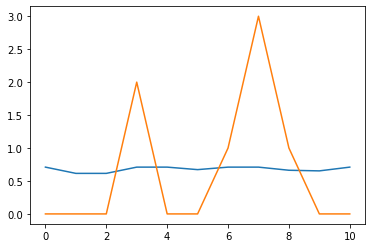

In [39]:
#standard linear regression

lineReg.fit(x_train, y_train)
print(lineReg.score(x_test, y_test))
print(lineReg.coef_)


plt.plot(lineReg.predict(x_test))
plt.plot(y_test)
plt.show()

In [45]:
#creating predicative model for fado_type and board_disposition

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X= df.iloc[:,1:14]   
Y= df.iloc[:,-1] 


best_features= SelectKBest(score_func=chi2, k=3)
fit= best_features.fit(X,Y)

df_scores= pd.DataFrame(fit.scores_)
df_columns= pd.DataFrame(X.columns)


features_scores= pd.concat([df_columns, df_scores], axis=1)
features_scores.columns= ['Features', 'Score']
features_scores.sort_values(by = 'Score')


,Features,Score
10,rank_abbrev_incident,4.467317e+01
5,month_received,5.601366e+01
7,month_closed,6.851164e+01
8,year_closed,7.730225e+01
6,year_received,7.957197e+01
12,rank_now,2.387449e+02
11,rank_abbrev_now,5.430782e+02
0,first_name,2.270845e+03
1,last_name,5.402174e+03
9,command_at_incident,7.892737e+03
